<a href="https://colab.research.google.com/github/so-nafy/Projet_Deep-Learning_DOG/blob/main/Deep_Learning_DOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT + LOAD DATA

In [281]:
#https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf

import shutil
import random
import glob
from time import time
import shutil
import glob

import random
import os
import random
import numpy as np
import pandas as pd

## Import pr la construction du NN avec API functional 
import tensorflow 
print(tensorflow.__version__)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers

## Import pr le tuning 
# Petit Passage secret entre tf et sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [282]:
dataset_url_train = 'http://vision.stanford.edu/aditya86/ImageNetDogs/train_data.mat'
dataset_url_test = 'http://vision.stanford.edu/aditya86/ImageNetDogs/test_data.mat'
dataset_url_image_tar = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
dataset_url_annotation_tar ='http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar'
dataset_url_list_tar = 'http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar'

In [283]:
image_zip = tf.keras.utils.get_file('images.tar',
                                         cache_subdir=os.path.abspath('.'),
                                         origin = dataset_url_image_tar,
                                         extract = True)
os.remove(image_zip)

793583616/793579520 [==============================] - 37s 0us/step


In [ ]:
traindata_mat = tf.keras.utils.get_file('traindata.mat',
                                        cache_subdir=os.path.abspath('.'),
                                         origin = dataset_url_train,
                                         extract = False)

In [ ]:
from scipy.io import loadmat
test = loadmat('/content/drive/MyDrive/test_data.mat')
train = loadmat('/content/drive/MyDrive/train_data.mat')

In [ ]:
images =  !tar -xvf /content/drive/MyDrive/images.tar

In [ ]:
images

['Images/',
 'Images/n02085620-Chihuahua/',
 'Images/n02085620-Chihuahua/n02085620_10621.jpg',
 'Images/n02085620-Chihuahua/n02085620_10976.jpg',
 'Images/n02085620-Chihuahua/n02085620_11238.jpg',
 'Images/n02085620-Chihuahua/n02085620_11258.jpg',
 'Images/n02085620-Chihuahua/n02085620_11337.jpg',
 'Images/n02085620-Chihuahua/n02085620_1152.jpg',
 'Images/n02085620-Chihuahua/n02085620_11696.jpg',
 'Images/n02085620-Chihuahua/n02085620_11818.jpg',
 'Images/n02085620-Chihuahua/n02085620_11948.jpg',
 'Images/n02085620-Chihuahua/n02085620_1205.jpg',
 'Images/n02085620-Chihuahua/n02085620_12334.jpg',
 'Images/n02085620-Chihuahua/n02085620_1235.jpg',
 'Images/n02085620-Chihuahua/n02085620_1298.jpg',
 'Images/n02085620-Chihuahua/n02085620_13151.jpg',
 'Images/n02085620-Chihuahua/n02085620_1321.jpg',
 'Images/n02085620-Chihuahua/n02085620_13383.jpg',
 'Images/n02085620-Chihuahua/n02085620_1346.jpg',
 'Images/n02085620-Chihuahua/n02085620_14413.jpg',
 'Images/n02085620-Chihuahua/n02085620_14516

Annotation

In [ ]:
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test_info', 'test_fg_data', 'test_data'])

In [ ]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_info', 'train_fg_data', 'train_data'])

In [ ]:
type (test['test_fg_data']), test['test_data'].shape

(numpy.ndarray, (8580, 12000))

In [ ]:
type (train['train_fg_data']), train['train_data'].shape

(numpy.ndarray, (12000, 12000))

In [ ]:
print(train)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:03:37 2012', '__version__': '1.0', '__globals__': [], 'train_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object), array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
       [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
       [array(['n02116738-Afri

In [ ]:
path = os.getcwd()
path

'/content'

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

Exploration de la data

In [ ]:
os.makedirs('/content/drive/MyDrive/Data') 

In [ ]:
import os
import random
import glob

# répertoire de travail
os.chdir('/content/drive/MyDrive/Data')
os.makedirs('Train')
os.makedirs('Valid')
os.makedirs('Test')

In [ ]:
os.listdir('/content/drive/MyDrive/Data'+os.path.join("/Train"))

['n02113624-toy_poodle',
 'n02112706-Brabancon_griffon',
 'n02113712-miniature_poodle',
 'n02113978-Mexican_hairless',
 'n02113186-Cardigan',
 'n02113799-standard_poodle',
 'n02115641-dingo',
 'n02116738-African_hunting_dog',
 'n02113023-Pembroke',
 'n02115913-dhole',
 'n02111500-Great_Pyrenees',
 'n02112137-chow',
 'n02111277-Newfoundland',
 'n02112018-Pomeranian',
 'n02110627-affenpinscher',
 'n02112350-keeshond',
 'n02111129-Leonberg',
 'n02111889-Samoyed',
 'n02110958-pug',
 'n02110806-basenji',
 'n02110063-malamute',
 'n02109961-Eskimo_dog',
 'n02108422-bull_mastiff',
 'n02109525-Saint_Bernard',
 'n02108551-Tibetan_mastiff',
 'n02108000-EntleBucher',
 'n02108915-French_bulldog',
 'n02109047-Great_Dane',
 'n02108089-boxer',
 'n02110185-Siberian_husky',
 'n02107142-Doberman',
 'n02107683-Bernese_mountain_dog',
 'n02107312-miniature_pinscher',
 'n02106030-collie',
 'n02107908-Appenzeller',
 'n02106662-German_shepherd',
 'n02106382-Bouvier_des_Flandres',
 'n02106550-Rottweiler',
 'n02

In [ ]:
import pathlib
data=pathlib.Path('/content/drive/MyDrive/Data') 
print(data)

#path = os.getcwd()
#path

/content/drive/MyDrive/Data


In [ ]:
import os
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf

In [ ]:
imread('/content/drive/MyDrive/Data/Train/n02085620-Chihuahua/n02085620_4602.jpg')

array([[[237, 241, 250],
        [237, 241, 250],
        [237, 241, 250],
        ...,
        [229, 236, 244],
        [229, 236, 244],
        [229, 236, 244]],

       [[237, 241, 250],
        [237, 241, 250],
        [237, 241, 250],
        ...,
        [229, 236, 244],
        [229, 236, 244],
        [229, 236, 244]],

       [[237, 241, 250],
        [237, 241, 250],
        [236, 240, 249],
        ...,
        [229, 236, 244],
        [229, 236, 244],
        [229, 236, 244]],

       ...,

       [[186, 158, 119],
        [184, 156, 117],
        [186, 158, 119],
        ...,
        [176, 187, 129],
        [183, 196, 142],
        [176, 189, 135]],

       [[188, 160, 121],
        [187, 159, 120],
        [189, 161, 122],
        ...,
        [152, 161, 104],
        [170, 181, 125],
        [180, 193, 139]],

       [[194, 166, 127],
        [192, 164, 125],
        [195, 167, 128],
        ...,
        [123, 132,  75],
        [144, 155,  99],
        [171, 184, 130]]

In [ ]:
a ='/content/drive/MyDrive/Data/Train/n02113023-Pembroke/n02113023_10636.jpg'

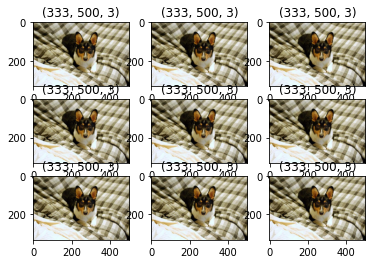

In [ ]:
# Une boucle pr afficher plusieurs images dans une figure

for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = a
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)

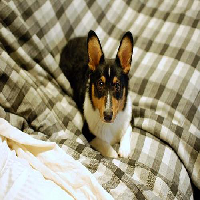

In [ ]:
tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Data/Train/n02113023-Pembroke/n02113023_10636.jpg', target_size=(200, 200))

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory(
    'Train', # path du train 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode= 'binary'
)

Found 5044 images belonging to 120 classes.


In [ ]:
val_gen = val_datagen.flow_from_directory(
    'Valid', 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode= 'binary'
)


Found 9014 images belonging to 50 classes.


In [ ]:
import cv2
from PIL import ImageFile
import matplotlib.pyplot as plt                        
%matplotlib inline
import pandas as pd

In [ ]:
type(val_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='Train', target_size=(224,224), class_mode='binary', batch_size=10)

Found 5044 images belonging to 120 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 15, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#Affichage de 15 images

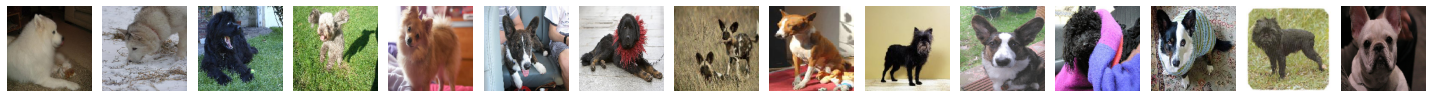

In [ ]:
plotImages(imgs)

In [ ]:
labels

array([106.,  98., 104., 114., 107., 112.,  93., 119., 101., 100., 112.,
       113., 112., 100.,  94., 106., 102., 111., 114.,  99.],
      dtype=float32)

In [ ]:
# Visualiser les images resizés et rescalés
imgs, labels = next(train_gen)
labels
imgs
train_gen

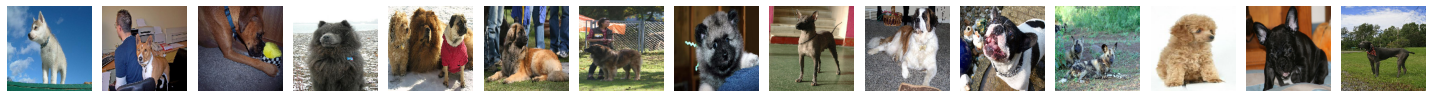

In [ ]:
plotImages(imgs)

In [ ]:
labels

array([106.,  98., 104., 114., 107., 112.,  93., 119., 101., 100., 112.,
       113., 112., 100.,  94., 106., 102., 111., 114.,  99.],
      dtype=float32)

Partie II

Construction du CNN

In [ ]:
# Dans le cadre du df comme features
inputs = tf.keras.layers.Input(shape=(2, ))

In [ ]:
#Transformation des images : precisez:les dimensions de l'images(hauteur, largeur)
inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0   

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [ ]:
history = model.fit_generator(train_gen, epochs=5, steps_per_epoch=100, 
          validation_data=val_gen, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 255s 3s/step - loss: -4923129331712.0000 - acc: 0.0000e+00 - val_loss: -1885646094336.0000 - val_acc: 0.0220
Epoch 2/5
100/100 [==============================] - 216s 2s/step - loss: -14296244289536.0000 - acc: 0.0000e+00 - val_loss: -5043881246720.0000 - val_acc: 0.0200
Epoch 3/5
100/100 [==============================] - 188s 2s/step - loss: -34288246456320.0000 - acc: 0.0000e+00 - val_loss: -10969284608000.0000 - val_acc: 0.0190
Epoch 4/5
100/100 [==============================] - 174s 2s/step - loss: -70853194678272.0000 - acc: 0.0000e+00 - val_loss: -21820755410944.0000 - val_acc: 0.0160
Epoch 5/5
100/100 [==============================] - 155s 2s/step - loss: -134435051667456.0000 - acc: 0.0000e+00 - val_loss: -41309725261824.0000 - val_acc: 0.0190


In [ ]:
#test_resnet50 = '/content/drive/MyDrive/Data/Test'

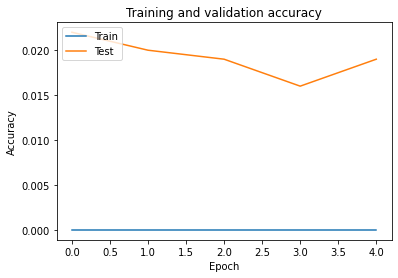

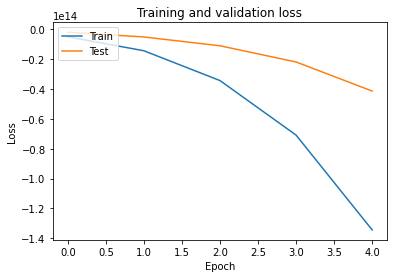

In [ ]:
# Plot training & validation accuracy values
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure()

# Plot training & validation loss values
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Lutter contre le surapprentissage

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen

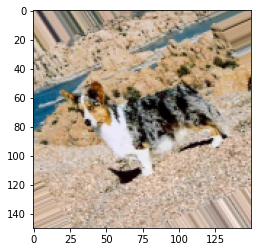

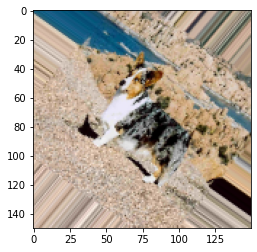

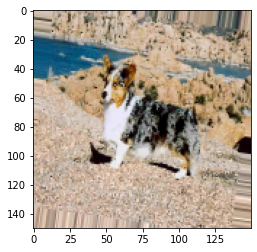

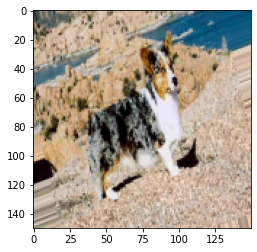

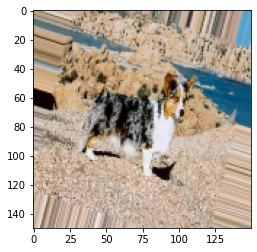

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img('/content/drive/MyDrive/Data/Train/n02113186-Cardigan/n02113186_1016.jpg', target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
____________________________________________________

In [ ]:
cnn.add(tf.keras.layers.Dense(512, activation='relu'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4

In [ ]:
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
(1200 * 512) + 512

614912

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4

In [ ]:
cnn.get_weights()

[array([[[[ 5.71760088e-02,  9.66477692e-02,  4.26465273e-02,
            1.55839354e-01,  1.01397306e-01,  1.80671722e-01,
            7.46314526e-02, -1.14641182e-01, -9.77983773e-02,
           -1.60451069e-01,  1.33269578e-01,  1.37459159e-01,
           -7.75182769e-02, -9.87935066e-03,  4.29320037e-02,
            6.16863817e-02],
          [ 1.64159626e-01, -2.93643773e-02,  1.55006051e-02,
           -9.70333070e-02,  1.73512757e-01, -6.63220808e-02,
            1.07635915e-01,  4.54760045e-02, -1.56343341e-01,
            9.04798508e-05,  1.13975793e-01,  3.89710218e-02,
            2.38282830e-02, -5.90860248e-02,  1.83068961e-02,
           -1.59107789e-01],
          [ 1.19294673e-02,  1.05262458e-01, -9.32346731e-02,
            1.62822068e-01, -1.75960466e-01, -1.34334803e-01,
           -1.53754592e-01, -1.75026715e-01,  6.59052730e-02,
           -9.03763920e-02,  9.27538276e-02, -9.30223539e-02,
           -6.77069873e-02,  1.37784749e-01, -2.37094015e-02,
            

# Partie III

In [ ]:
#https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

Test_Prediction

In [ ]:
#Entrainement Modele

In [ ]:
STEP_SIZE_Train=train_gen.n//train_gen.batch_size
train_gen.reset()
pred=model.predict_generator(train_gen,
steps=STEP_SIZE_Train,
verbose=1)

80/80 [==============================] - 200s 2s/step


#Test Tranfer Learning

In [ ]:
#Telechargement ensv data Stanfort a partir biblio de Tensorflow

import tensorflow_datasets as tfds

dataset, info = tfds.load(name="stanford_dogs", with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete0396KE/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete0396KE/stanford_dogs-test.tfrecord


Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


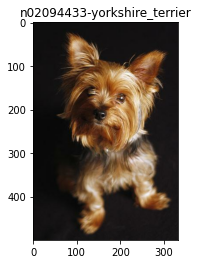

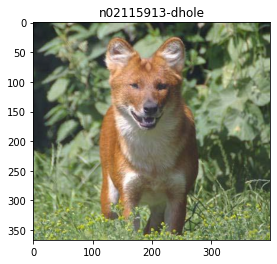

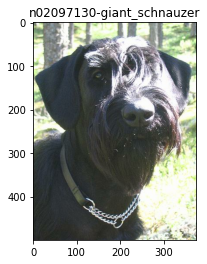

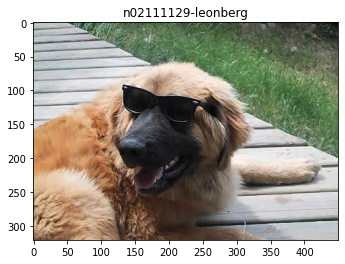

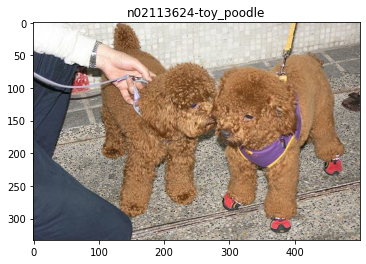

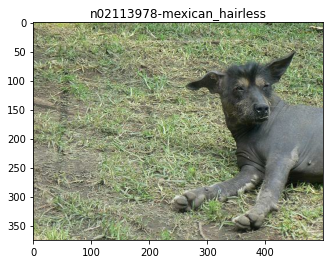

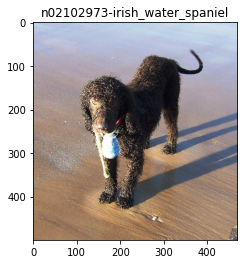

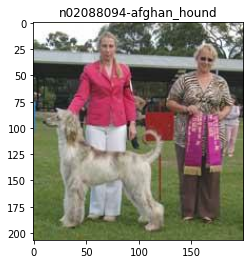

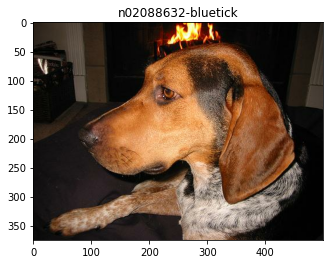

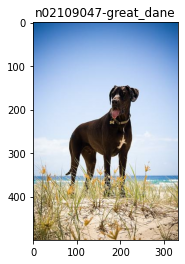

In [285]:
# fonction pour convertir les index d'étiquettes en race
get_name = info.features['label'].int2str

for doggo in dataset['train'].take(10):
    plt.figure()
    plt.imshow(doggo['image'])
    plt.title(get_name(doggo['label']))

In [ ]:
IMG_LEN = 224
IMG_SHAPE = (IMG_LEN,IMG_LEN,3)
N_BREEDS = 120

training_data = dataset['train']
test_data = dataset['test']

def preprocess(ds_row):
  
    # Image conversion int->float + resizing
    image = tf.image.convert_image_dtype(ds_row['image'], dtype=tf.float32)
    image = tf.image.resize(image, (IMG_LEN, IMG_LEN), method='nearest')
  
    # Onehot encoding labels
    label = tf.one_hot(ds_row['label'],N_BREEDS)

    return image, label

def prepare(dataset, batch_size=None):
    ds = dataset.map(preprocess, num_parallel_calls=4)
    ds = ds.shuffle(buffer_size=1000)
    if batch_size:
      ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return ds

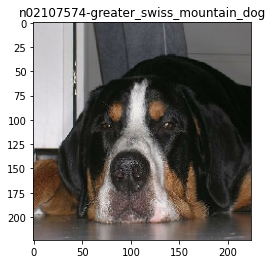

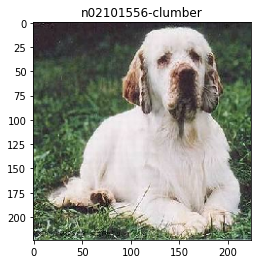

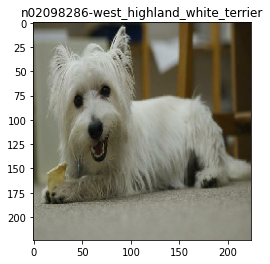

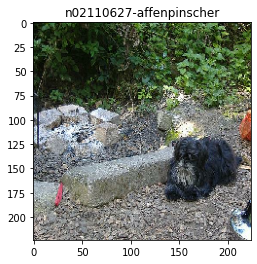

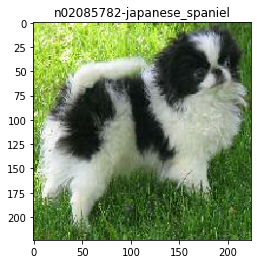

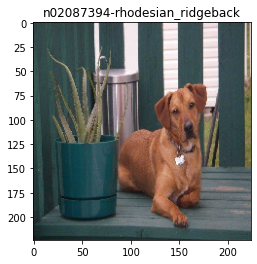

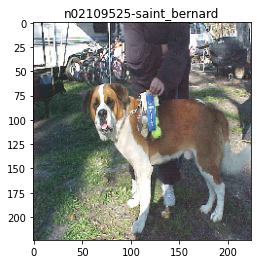

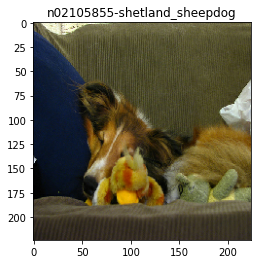

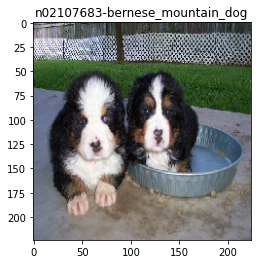

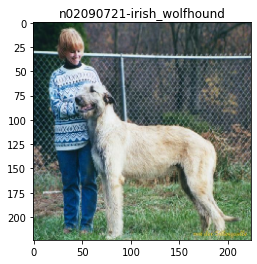

In [ ]:
decode = lambda x: get_name(tf.math.argmax(x))

for pic, label in prepare(training_data).take(10):
  plt.figure()
  plt.imshow(pic)
  plt.title(decode(label))

In [ ]:
Model building + Training

In [ ]:
##j'expérimente récemment avec TensorFlow Lite et que je prévois de le déployer sur mon smartphone à des fins de test, 
#j'ai décidé de commencer avec un réseau MobileNetV2 pré- entraîné , car il est très performant sur les appareils mobiles.
#Ce réseau servira de base

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [288]:
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(N_BREEDS, activation='softmax')
])

In [289]:
# hyperparameter optimization
model.compile(optimizer=tf.keras.optimizers.Adamax(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'top_k_categorical_accuracy'])
			  
train_batches = prepare(training_data, batch_size=32)
test_batches = prepare(test_data, batch_size=32)

history = model.fit(train_batches,
                    epochs=5,
                    validation_data=test_batches)

Epoch 1/5
375/375 [==============================] - 836s 2s/step - loss: 4.8505 - accuracy: 0.0217 - top_k_categorical_accuracy: 0.0865 - val_loss: 4.3051 - val_accuracy: 0.0761 - val_top_k_categorical_accuracy: 0.2266
Epoch 2/5
375/375 [==============================] - 810s 2s/step - loss: 4.1568 - accuracy: 0.1002 - top_k_categorical_accuracy: 0.2966 - val_loss: 3.8618 - val_accuracy: 0.1647 - val_top_k_categorical_accuracy: 0.4362
Epoch 3/5
375/375 [==============================] - 816s 2s/step - loss: 3.7208 - accuracy: 0.1996 - top_k_categorical_accuracy: 0.4925 - val_loss: 3.4790 - val_accuracy: 0.2657 - val_top_k_categorical_accuracy: 0.6122
Epoch 4/5
375/375 [==============================] - 808s 2s/step - loss: 3.3353 - accuracy: 0.3049 - top_k_categorical_accuracy: 0.6594 - val_loss: 3.1451 - val_accuracy: 0.3571 - val_top_k_categorical_accuracy: 0.7301
Epoch 5/5
375/375 [==============================] - 803s 2s/step - loss: 2.9997 - accuracy: 0.3958 - top_k_categorical_

In [286]:
#model.summary()

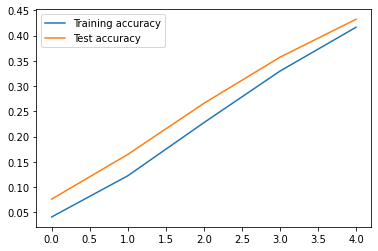

In [290]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [ ]:
# Test avec RESTNET50 

In [ ]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [ ]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_breed(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151))

In [ ]:
weights='imagenet'